# TokenSHAP Class Usage Tutorial

This tutorial demonstrates how to use the refactored `TokenSHAP` class to analyze the importance of different parts of a prompt in generating a model's response. We will explore how to use both local Hugging Face models and API-based models (like Ollama) with the `TokenSHAP` class. Additionally, we'll cover how to customize the splitting of prompts to suit different needs.

## Table of Contents

1. [Setup](#setup)
2. [Using a Local Hugging Face Model](#using-a-local-hugging-face-model)
    - [Example 1: Simple Question](#example-1-simple-question)
    - [Example 2: Code Completion](#example-2-code-completion)
    - [Example 3: Medical Diagnosis](#example-3-medical-diagnosis)
3. [Using an API-Based Model](#using-an-api-based-model)
    - [Setup for API Model](#setup-for-api-model)
    - [Example with API Model](#example-with-api-model)
4. [Customizing the Splitter](#customizing-the-splitter)
    - [Sentence-Level Splitting](#sentence-level-splitting)
    - [Example with Sentence Splitter](#example-with-sentence-splitter)
5. [Conclusion](#conclusion)

In [1]:
from token_shap import *

## Using a Local Hugging Face Model

In this section, we'll demonstrate how to use the `TokenSHAP` class with a local Hugging Face model. We'll use the `gpt2` model for simplicity, but you can replace it with any model you have available.

### Example 1: Simple Question

**Prompt:** `"why is the sky blue?"`

**Parameters Explanation:**

- **Model:** We'll use a local GPT-2 model.
- **Splitter:** We'll use the `WhitespaceSplitter`, which splits the prompt by spaces.
- **Sampling Ratio:** Set to `1.0` to sample 100% of all possible combinations (this will cause a longer running time but will allow the exact values ​​to be calculated).


In [2]:
model_name_or_path = "meta-llama/Llama-3.2-3B-Instruct"
model = LocalModel(model_name_or_path)
splitter = StringSplitter()
token_shap = TokenSHAP(model, splitter)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
prompt = "Why is the sky blue?"

df = token_shap.analyze(prompt, sampling_ratio=1.0, print_highlight_text=True)

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]

Why is the sky blue? 


You can see the important tokens highlighted.

Now let's take a look at the calculations that the algorithm performed to understand how it reached this conclusion:

You can see what the baseline is, that is, the output of the model for the full question:

In [4]:
print("Baseline Text:")
print(token_shap.baseline_text)

Baseline Text:
This is a question that has puzzled humans for centuries, and while we still don't have a definitive answer, scientists have made some progress in understanding the phenomenon.
The short answer is that the sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century. Here's a simplified explanation:

**What is Rayleigh scattering?**

When sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as


You can also see all the subgroups and responses of the model for them, as well as the similarity index for the full response

In [5]:
df

,Prompt,Response,Token_Indexes,Cosine_Similarity
0,is the sky blue?,(a) yes (b) is the sky blue? (c) is the sky bl...,"(2, 3, 4, 5)",0.363800
1,Why the sky blue?,Why not green or purple?\nThe sky appears blue...,"(1, 3, 4, 5)",0.523620
2,Why is sky blue?,The short answer is that it's because of a thi...,"(1, 2, 4, 5)",0.519913
3,Why is the blue?,(The Blue in Blue Moon)\nWhy is the blue?\nIt'...,"(1, 2, 3, 5)",0.194183
4,Why is the sky,blue?\nThe sky appears blue because of a pheno...,"(1, 2, 3, 4)",0.565124
5,Why sky blue?,Why not green or purple?\nThe sky appears blue...,"(1, 4, 5)",0.510949
6,is sky,rim's dragonborn DLC a must-play?\nThe Elder S...,"(2, 4)",0.056695
7,sky,line of the city\nThe city skyline is a visual...,"(4,)",0.088633
8,is the sky,blue because of the sun\nThe sky appears blue ...,"(2, 3, 4)",0.270292
9,Why is sky,diving so popular?\nSkydiving is a thrilling a...,"(1, 2, 4)",0.108305


The class also offers some additional built-in visualizations:

In [6]:
token_shap.print_colored_text()

Why is the sky blue? 


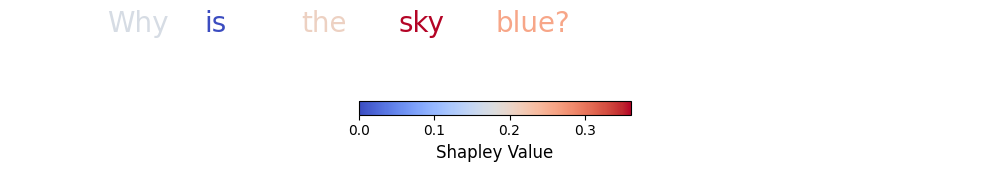

In [7]:
token_shap.plot_colored_text()

And in addition, you can see the raw SHAP values ​​for each token:

In [8]:
token_shap.shapley_values

{'Why_1': 0.17197342603012344,
 'is_2': 0.0,
 'the_3': 0.20747928096497595,
 'sky_4': 0.3614775663685906,
 'blue?_5': 0.25906972663631006}

### Example 2: Code Completion
Prompt: 'Complete the following code: def quick_sort(arr):'

In [9]:
# Define the prompt
prompt = "Complete the following code: def quick_sort(arr):"

# Analyze the prompt
df = token_shap.analyze(prompt, sampling_ratio=0.2, print_highlight_text=True)

Processing combinations:   0%|          | 0/12 [00:00<?, ?it/s]

Complete the following code: def quick_sort(arr): 


### Example 3: Medical Diagnosis

Note: For longer prompts, the analysis might take more time due to the increased number of tokens. therefore in this example I chose to use only the important sample and set the sampling_ratio to 0.

In [10]:
prompt = """
Patient is a 45-year-old male presenting with fatigue, fever, shortness of breath,
and occasional chest pain. Symptoms have persisted for two weeks.
Blood tests show elevated white blood cell count, while chest X-ray indicates mild lung inflammation.
Family history includes cardiovascular disease and asthma.
What is the most likely diagnosis for this patient based on the symptoms and medical history?
"""

df = token_shap.analyze(prompt, sampling_ratio=0.0, print_highlight_text=True)

Processing combinations:   0%|          | 0/60 [00:00<?, ?it/s]

Patient is a 45-year-old male presenting with fatigue, fever, shortness of breath, and occasional chest pain. Symptoms have persisted for two weeks. Blood tests show elevated white blood cell count, while chest X-ray indicates mild lung inflammation. Family history includes cardiovascular disease and asthma. What is the most likely diagnosis for this patient based on the symptoms and medical history? 


## Using an API-Based Model

### Setup for API Model
To use an API-based model, you need to use the OllamaModel class.

Through Ollama you will be able to communicate with open source models and OpenAI models.

In [11]:
model_name = "llama3.2:3b"
api_url = "http://localhost:11434"
api_model = OllamaModel(model_name=model_name, api_url=api_url)
splitter = StringSplitter()
token_shap_api = TokenSHAP(api_model, splitter, debug=False)

In [12]:
# Define the prompt
prompt = "why is the sky blue?"

# Analyze the prompt using the API model
df_api = token_shap_api.analyze(prompt, sampling_ratio=0.3, print_highlight_text=False)

Processing combinations:   0%|          | 0/9 [00:00<?, ?it/s]

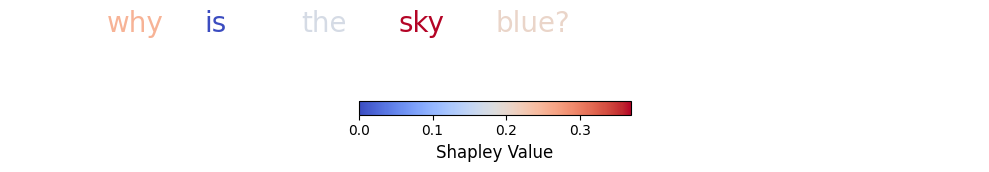

In [13]:
token_shap_api.plot_colored_text()

In [14]:
token_shap_api.print_colored_text()

why is the sky blue? 


In [15]:
token_shap_api.highlight_text_background()

why is the sky blue? 


## Customizing the Splitter

Sentence-Level Splitting
For more advanced analysis, you might want to split the prompt into sentences rather than words. You can customized the splitter for this purpose.

In [16]:
model_name = "llama3.2:3b"
api_url = "http://localhost:11434"

api_model = OllamaModel(model_name=model_name, api_url=api_url)
splitter = StringSplitter(split_pattern='\.')
token_shap_api = TokenSHAP(api_model, splitter, debug=False)

In [17]:
prompt = """Our company is experiencing a decline in quarterly sales for the first time in five years.
Recent market trends indicate increased competition from new startups offering similar products at lower prices.
Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter.
In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products.
Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base.
What strategic actions should our company consider to regain market share and improve customer satisfaction?
"""

#### Output Explanation:

The analysis will consider each sentence as a token, allowing you to understand the importance of each sentence in generating the model's response.

In [18]:
splitter.split(prompt)

['Our company is experiencing a decline in quarterly sales for the first time in five years',
 '\nRecent market trends indicate increased competition from new startups offering similar products at lower prices',
 '\nDespite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter',
 '\nIn addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products',
 '\nOur largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base',
 '\nWhat strategic actions should our company consider to regain market share and improve customer satisfaction?']

In [19]:
df_sentence = token_shap_api.analyze(prompt, sampling_ratio=0.5)

Processing combinations:   0%|          | 0/31 [00:00<?, ?it/s]

In [21]:
len(df_sentence)

31

In [20]:
df_sentence.head()

,Prompt,Response,Token_Indexes,Cosine_Similarity
0,Recent market trends indicate increased compe...,Based on the recent market trends and challeng...,"(2, 3, 4, 5, 6)",0.659753
1,Our company is experiencing a decline in quart...,"Given the decline in quarterly sales, decrease...","(1, 3, 4, 5, 6)",0.620617
2,Our company is experiencing a decline in quart...,"In response to the decline in quarterly sales,...","(1, 2, 4, 5, 6)",0.613172
3,Our company is experiencing a decline in quart...,"Given the challenges you're facing, here are s...","(1, 2, 3, 5, 6)",0.569367
4,Our company is experiencing a decline in quart...,"Based on the information provided, here are so...","(1, 2, 3, 4, 6)",0.628218


/srv/jupyterhub/research/ronig/TokenSHAP/token_shap/token_shap.py:301: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


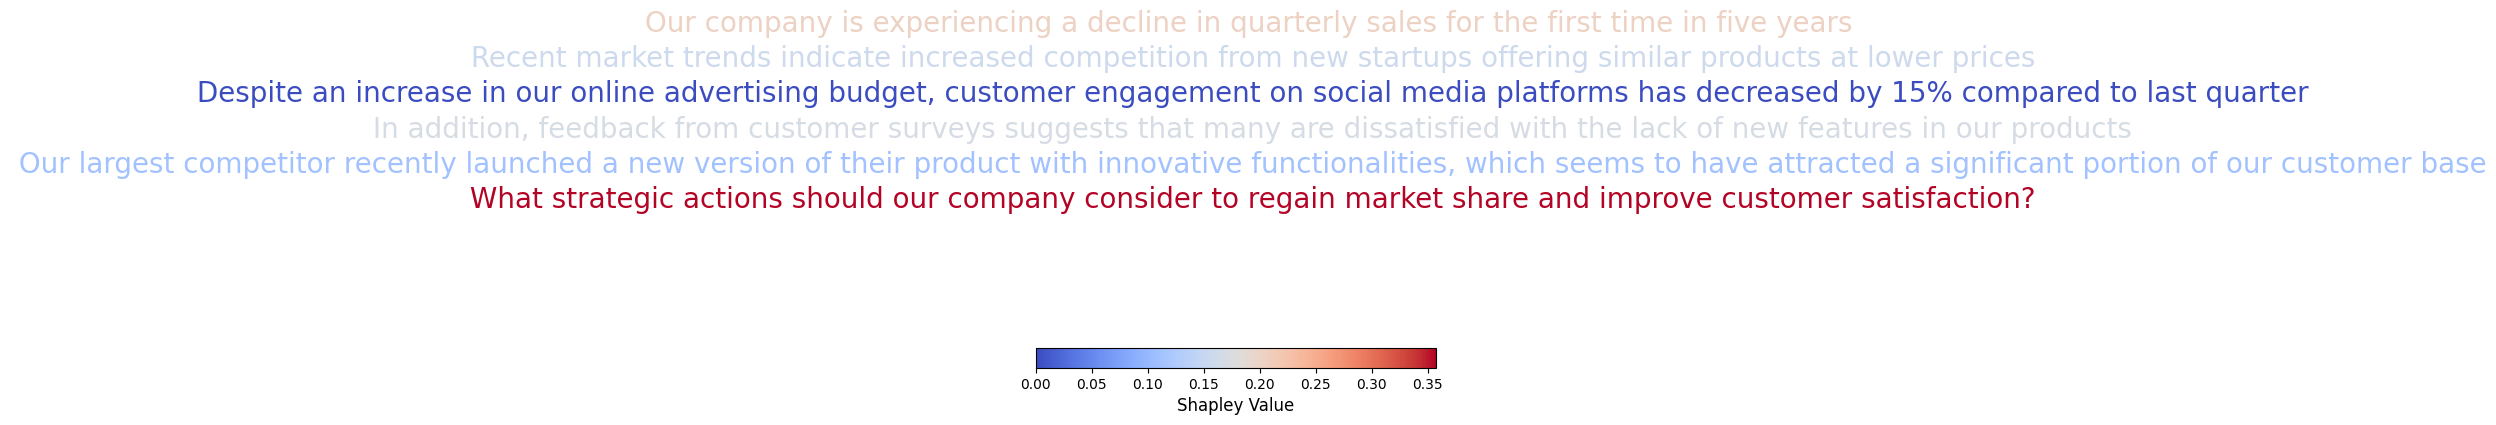

In [22]:
token_shap_api.plot_colored_text(new_line = True)

In [23]:
token_shap_api.print_colored_text()

Our company is experiencing a decline in quarterly sales for the first time in five years  Recent market trends indicate increased competition from new startups offering similar products at lower prices  Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter  In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products  Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base  What strategic actions should our company consider to regain market share and improve customer satisfaction? 


In [24]:
token_shap_api.highlight_text_background()

Our company is experiencing a decline in quarterly sales for the first time in five years  Recent market trends indicate increased competition from new startups offering similar products at lower prices  Despite an increase in our online advertising budget, customer engagement on social media platforms has decreased by 15% compared to last quarter  In addition, feedback from customer surveys suggests that many are dissatisfied with the lack of new features in our products  Our largest competitor recently launched a new version of their product with innovative functionalities, which seems to have attracted a significant portion of our customer base  What strategic actions should our company consider to regain market share and improve customer satisfaction? 


# Conclusion
In this tutorial, we've demonstrated how to use the TokenSHAP class to analyze the impact of different parts of a prompt on a model's output. We've covered:

- Using local Hugging Face models.
- Using API-based models.
- Customizing the tokenization through splitters.

Feel free to experiment with different models, prompts, and splitting strategies to gain deeper insights into how models generate responses based on input prompts.

Note: The actual computation of Shapley values and the processing of combinations can be computationally intensive, especially for longer prompts or higher sampling ratios. Adjust the sampling_ratio parameter accordingly to balance between accuracy and computation time.